## sklearn.linear_model.Ridge
* class sklearn.linear_model.Ridge(alpha=1.0, *, fit_intercept=True, copy_X=True, max_iter=None, tol=0.0001, solver='auto', positive=False, random_state=None)

In [10]:
import pandas as pd
import numpy as np
# 앞의 LinearRegression 예제에서 분할한 feature 데이터 셋인 X_data과 Target 데이터 셋인 y_target 데이터셋을 그래도 이용
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# boston 데이터셋 로드
boston = pd.read_csv("./datasets/Boston.csv" , index_col=0)

# boston datset의 target array는 주택가격. medv 컬럼으로 DataFrame 에 존재

y_target = boston['medv']
X_data = boston.drop(["medv"], axis = 1, inplace = False)

# 릿지 클래스
ridge = Ridge(alpha=10)
neg_mse_score = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_score = np.sqrt(-1 *neg_mse_score)
avg_rmse = np.mean(rmse_score)

print(" 5 folds 의 개별 Negative MSE scores : ", np.round(neg_mse_score, 3))
print(" 5 folds 의 개별 RMSE score : ", np.round(rmse_score, 3))
print(" 5 folds 의 개별 평균 RMSE : {0:.3f}".format(avg_rmse))

 5 folds 의 개별 Negative MSE scores :  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds 의 개별 RMSE score :  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds 의 개별 평균 RMSE : 5.518


In [12]:
# Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 iteration 하면서 alpha에 따른 평균 rmse 구함.
for alpha in alphas :
    ridge = Ridge(alpha = alpha)

    # cross_val_scores를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print("alpha {0} 일 때 5 fold 의 평균 RMSE : {1:.3f}".format(alpha, avg_rmse))

alpha 0 일 때 5 fold 의 평균 RMSE : 5.829
alpha 0.1 일 때 5 fold 의 평균 RMSE : 5.788
alpha 1 일 때 5 fold 의 평균 RMSE : 5.653
alpha 10 일 때 5 fold 의 평균 RMSE : 5.518
alpha 100 일 때 5 fold 의 평균 RMSE : 5.330


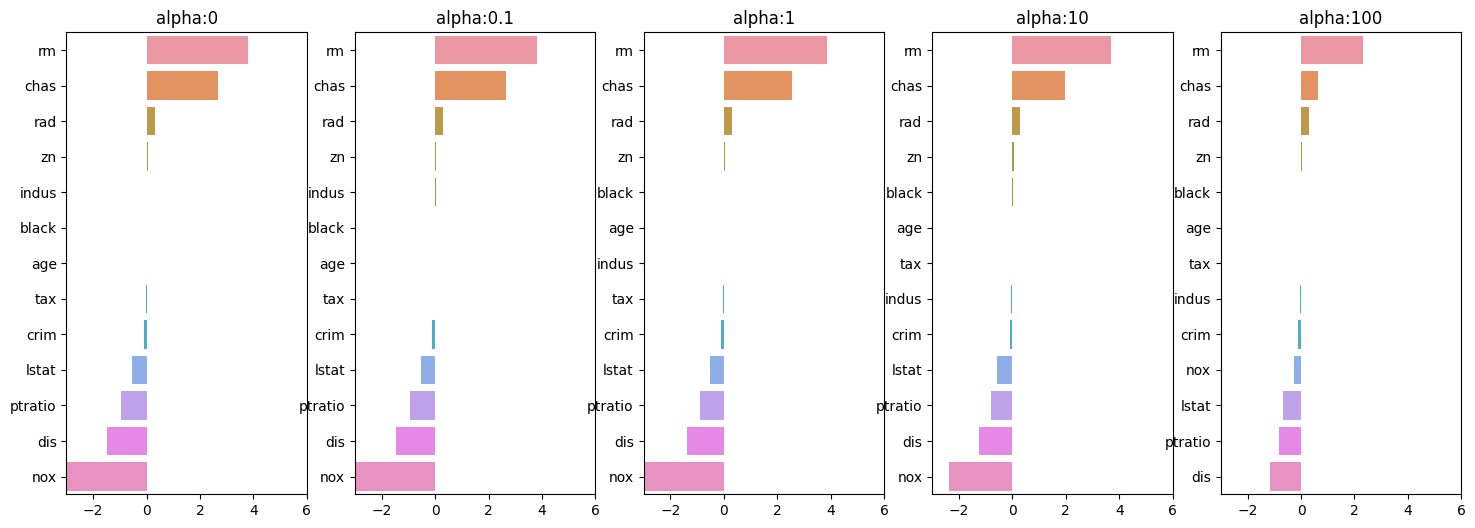

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플로립 축 생성
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False) # 회귀 계수 값이 높은 순으로 정렬
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

# for문 바깥에서 맷롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

In [14]:
# 알파 값에 따른 회귀 계수 출력
ridge_alphas = [0, 0.1 ,1, 10, 100]
sort_column= 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
rm,3.809865,3.818233,3.854000,3.702272,2.334536
chas,2.686734,2.670019,2.552393,1.952021,0.638335
rad,0.306049,0.303515,0.290142,0.279596,0.315358
zn,0.046420,0.046572,0.047443,0.049579,0.054496
indus,0.020559,0.015999,-0.008805,-0.042962,-0.052826
black,0.009312,0.009368,0.009673,0.010037,0.009393
age,0.000692,-0.000269,-0.005415,-0.010707,0.001212
tax,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
crim,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
lstat,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764
